# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Importing Datset

In [3]:
data=pd.read_csv("winequality-red.csv")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Finding whether missing values exist or not

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# statistical measures of dataset

In [5]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Number of values for each quality

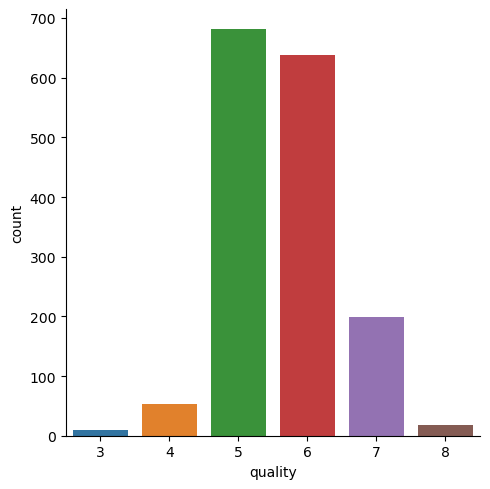

In [6]:
sns.catplot(x="quality",data=data,kind="count")

# Histogram for features

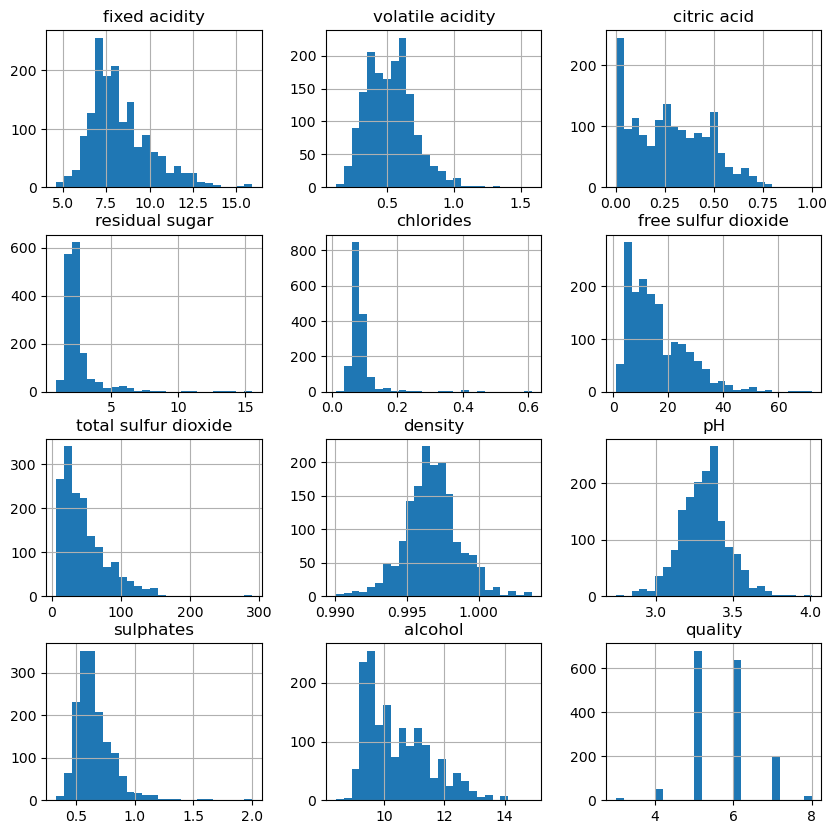

In [7]:
data.hist(bins=25,figsize=[10,10])
plt.show()

# Constructing the heatmap to determine the correlation between the features

<Axes: >

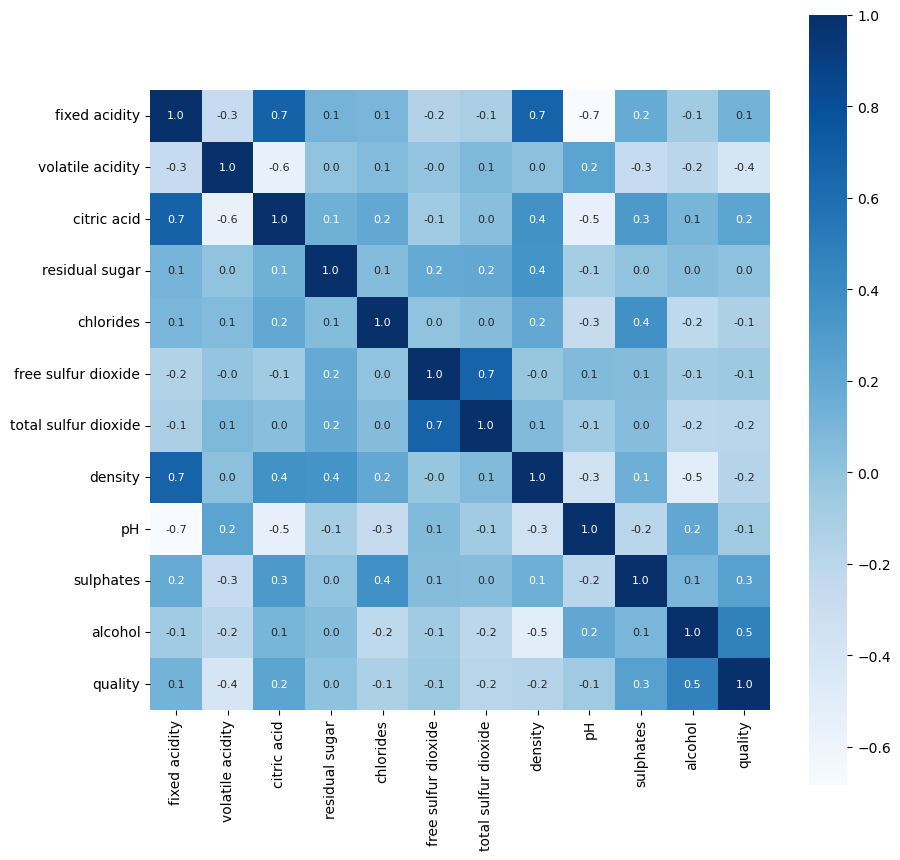

In [8]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

# Dependent and Independent variables

In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x)
print(y)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[5 5 5 ... 6 5 6]


# Train_Test_Split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Using Linear Regression Model

In [11]:
ob=LinearRegression()
k=ob.fit(x_train,y_train)

# Providing test data

In [12]:
te=ob.predict(x_test)
print(te)

[5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032 6.13959677 5.23386892
 5.54991474 5.25825299 5.44810502 6.46828999 5.15018088 5.59105157
 6.5560658  5.32255751 5.3918385  5.19610791 5.94475739 6.36197631
 5.35484893 5.41907575 6.36483321 5.35121573 5.172392   6.16987311
 5.25263058 5.50657406 5.75422105 5.39101712 5.45331031 5.02757499
 6.16173243 5.68661555 5.6486077  6.165471   5.52872593 5.24414488
 6.17724727 5.16500868 5.87598332 5.81317121 6.41982782 5.6059474
 5.15232137 5.55634632 5.16044852 5.10449459 5.58371721 6.33425313
 4.95134985 4.98364804 6.01041999 5.40809804 5.83802638 5.2486897
 5.60717482 5.96630957 5.27619063 5.30380113 6.4949309  5.42033967
 6.34273471 5.24618531 6.41317317 5.31237924 6.41746963 4.74315748
 5.79362039 5.8283184  6.17598768 5.29723707 6.76198733 5.89745261
 6.07833712 6.43522754 5.29499011 6.4546625  5.45007864 5.69644693
 5.72368681 6.41233601 5.31025119 5.84548953 6.31433877 5.205850

# Calculation Evaluation Metrics

In [13]:
mse=mean_squared_error(y_test,te)
rmse=np.sqrt(mse)
r2=r2_score(y_test,te)
mae=mean_absolute_error(y_test,te)
print("The R_squared score:",r2)
print("The Root mean squared error:",rmse)
print("The Mean absolute error:",mae)

The R_squared score: 0.403180341279622
The Root mean squared error: 0.6245199307980129
The Mean absolute error: 0.5035304415524369


# Visualization the distribution of differences between actual and predicted values

C:\Users\praneeth\AppData\Local\Temp\ipykernel_2964\1096470236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-te],bins=50)


<Axes: ylabel='Density'>

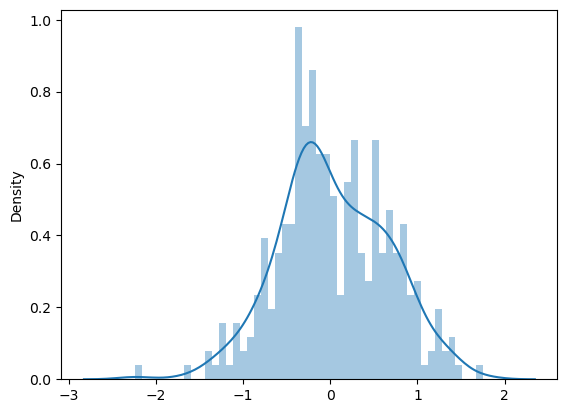

In [14]:
sns.distplot([y_test-te],bins=50)